<a href="https://colab.research.google.com/github/ayounnaeem/Data-Visualisation-Unit/blob/main/Assessment_3_Data_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/content/Impact_of_Remote_Work_on_Mental_Health.csv')  # Replace with your file name

# Preview the first few rows
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [13]:
# Checking for missing values
print(df.isnull().sum())

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64


In [14]:
print("Rows with missing values in specific columns:")
print(df[df[['Mental_Health_Condition', 'Physical_Activity']].isnull().any(axis=1)].head())

Rows with missing values in specific columns:
  Employee_ID  Age      Gender           Job_Role       Industry  \
2     EMP0003   59  Non-binary  Software Engineer      Education   
3     EMP0004   27        Male  Software Engineer        Finance   
4     EMP0005   49        Male              Sales     Consulting   
5     EMP0006   59  Non-binary              Sales             IT   
7     EMP0008   42  Non-binary     Data Scientist  Manufacturing   

   Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
2                   22        Hybrid                     46   
3                   20        Onsite                     32   
4                   32        Onsite                     35   
5                   31        Hybrid                     39   
7                    6        Onsite                     54   

   Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
2                          11                         5       Medium   
3                     

In [15]:
#Dropping missing values
df = df.dropna(subset=['Mental_Health_Condition'])

##Point Number 1

How does work location (remote, hybrid, onsite) correlate with stress levels and mental
health conditions

This Visualisation shows percentage Distribution of Stress Levels by Work Location

<Figure size 1200x600 with 0 Axes>

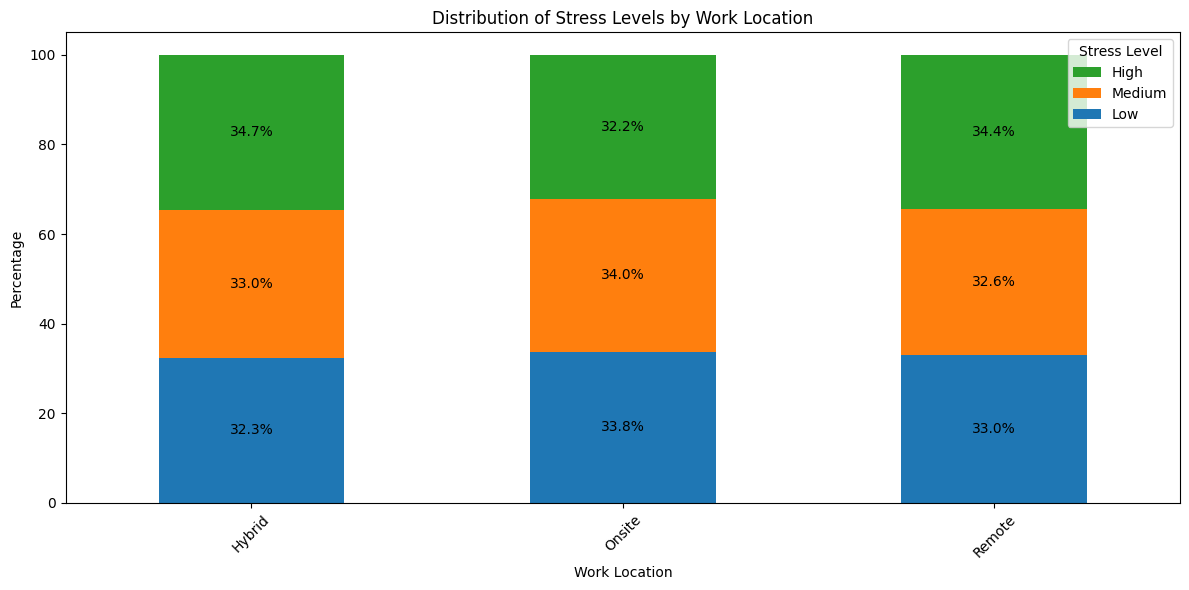

In [16]:
def create_stress_location_analysis(df):
    plt.figure(figsize=(12, 6))
    # Specify the order for stress levels
    stress_level_order = ["Low", "Medium", "High"]
    # Generate the crosstab with specified order
    stress_location = pd.crosstab(df['Work_Location'], df['Stress_Level'], normalize='index').reindex(columns=stress_level_order) * 100

    ax = stress_location.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title('Distribution of Stress Levels by Work Location')
    plt.xlabel('Work Location')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Add percentage labels on each segment
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='center')

    # Reorder legend manually
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[::-1], labels=labels[::-1], title='Stress Level')  # Reverse the legend order

    plt.show()


create_stress_location_analysis(df)

This Visualisation compares mental health condition based on three differnt working locations

<Figure size 1200x600 with 0 Axes>

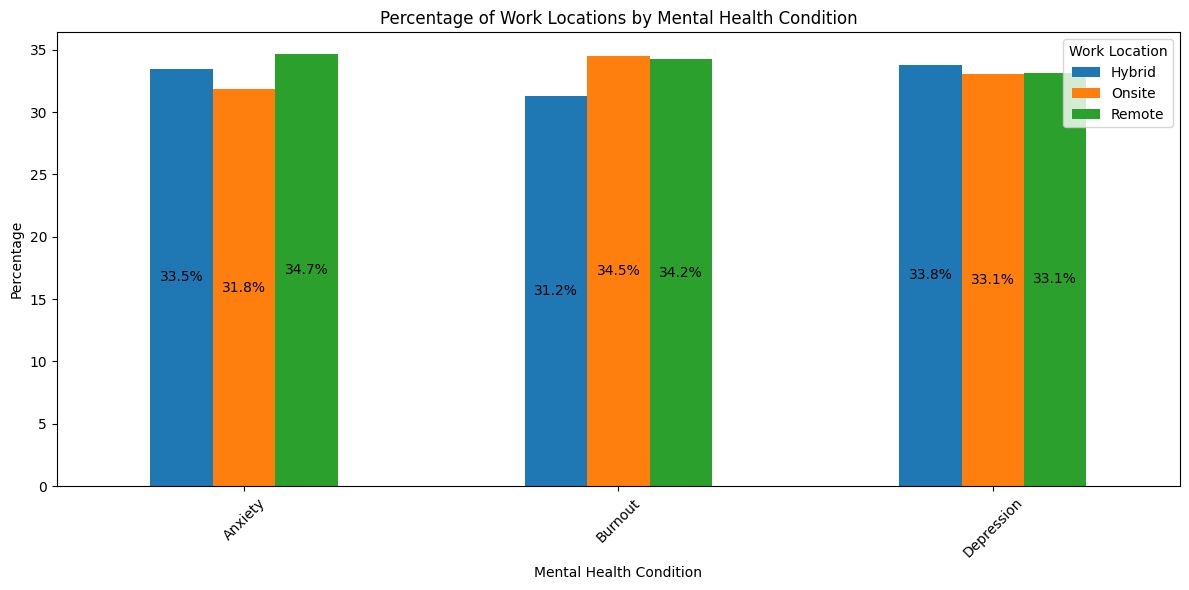

In [17]:
def create_mental_health_analysis_alternative(df):
    plt.figure(figsize=(12, 6))
    # Normalize data to show percentages by work location
    mental_health_location = pd.crosstab(df['Mental_Health_Condition'], df['Work_Location'], normalize='index') * 100

    # Plot as a grouped bar chart with mental health conditions on the x-axis
    ax = mental_health_location.plot(kind='bar', figsize=(12, 6))
    plt.title('Percentage of Work Locations by Mental Health Condition')
    plt.xlabel('Mental Health Condition')
    plt.ylabel('Percentage')
    plt.legend(title='Work Location')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Add percentage labels on each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='center')

    plt.show()

create_mental_health_analysis_alternative(df)

This visualisation compares work location with mental health using heatmap

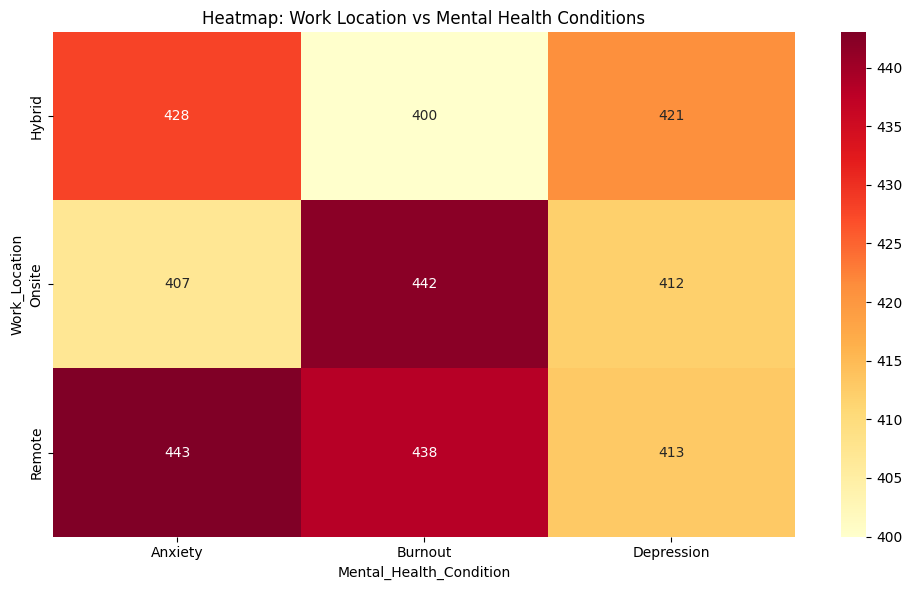

In [18]:
def create_heatmap_analysis(df):
    # Figure 3: Heatmap showing the relationship between work location and mental health conditions
    plt.figure(figsize=(10, 6))
    heatmap_data = pd.crosstab(df['Work_Location'], df['Mental_Health_Condition'])
    sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd')
    plt.title('Heatmap: Work Location vs Mental Health Conditions')
    plt.tight_layout()
    plt.show()

create_heatmap_analysis(df)

This visualisation compares work location with the counts of stress levels using heatmap

This visualisation is very intricate and can mislead.

For example from outside perspective it seems most remote workers feel high stress levels and hybrid workers feels lowest since the color is lightest but if we acrefully look most people in hybrid feel high stress due total counts

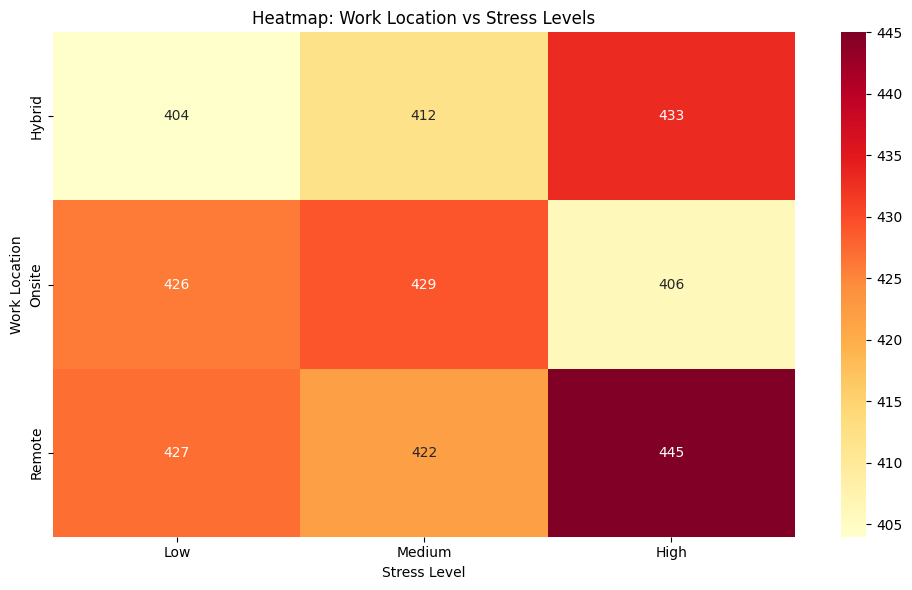

In [22]:
def create_heatmap_stress_levels(df):
    # Define the order of the stress levels
    stress_order = ['Low', 'Medium', 'High']

    # Create a crosstab for stress levels by work location with specified order
    heatmap_data = pd.crosstab(df['Work_Location'], df['Stress_Level'])[stress_order]

    # Plot heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd')
    plt.title('Heatmap: Work Location vs Stress Levels')
    plt.xlabel('Stress Level')
    plt.ylabel('Work Location')
    plt.tight_layout()
    plt.show()

# Call the function with your dataframe
create_heatmap_stress_levels(df)


##Point Number 2


How does remote work impact work-life balance across different age groups and job roles?

Keep in mind that we are undoing the drop of values we did in last point beacuse here we are not compaing mental health condition

df1 is our new dataframe for all data without any drop

df1_remote is filtered for Remote work location only

This visualistion shows us the count of each Work life balance rating based on each age group

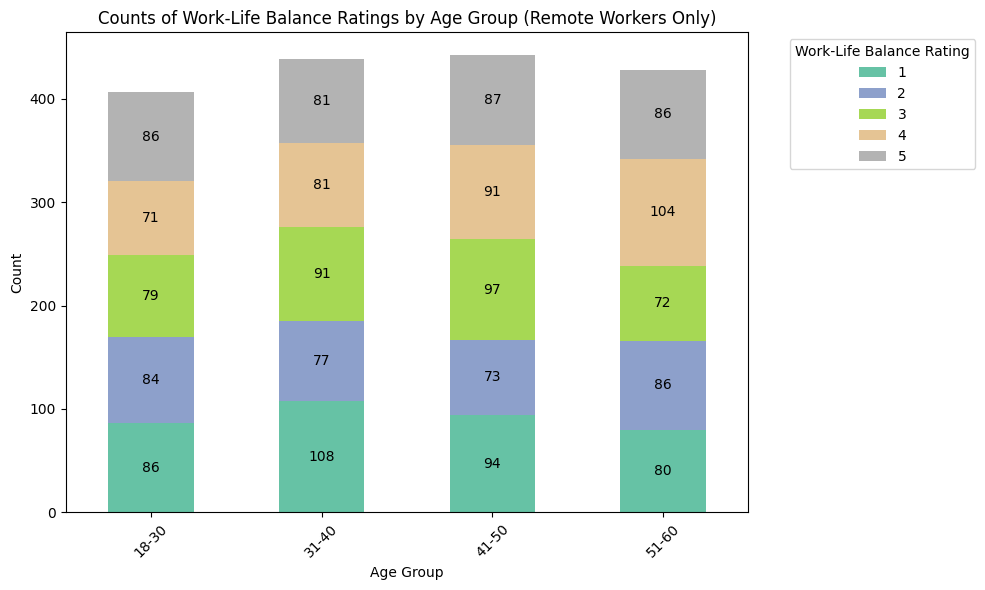

In [24]:
# Load the dataset
df1 = pd.read_csv('/content/Impact_of_Remote_Work_on_Mental_Health.csv')

# Define age groups and filter for only remote work location
bins = [18, 30, 40, 50, 60]
labels = ['18-30', '31-40', '41-50', '51-60']
df1['Age_Group'] = pd.cut(df1['Age'], bins=bins, labels=labels)
df1_remote = df1[df1['Work_Location'] == 'Remote']  # Filter for Remote work location only

# Create a crosstab to get counts of work-life balance ratings by age group for remote workers
crosstab_data = pd.crosstab(index=df1_remote['Age_Group'], columns=df1_remote['Work_Life_Balance_Rating'])

# Plot stacked bar chart
ax = crosstab_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Counts of Work-Life Balance Ratings by Age Group (Remote Workers Only)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Move legend to the right
plt.legend(title='Work-Life Balance Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add count labels
for i, bar_container in enumerate(ax.containers):
    ax.bar_label(bar_container, label_type='center')

plt.tight_layout()
plt.show()


Next 2 visualisations allow direct comparison between Remote and Un-Remote workers

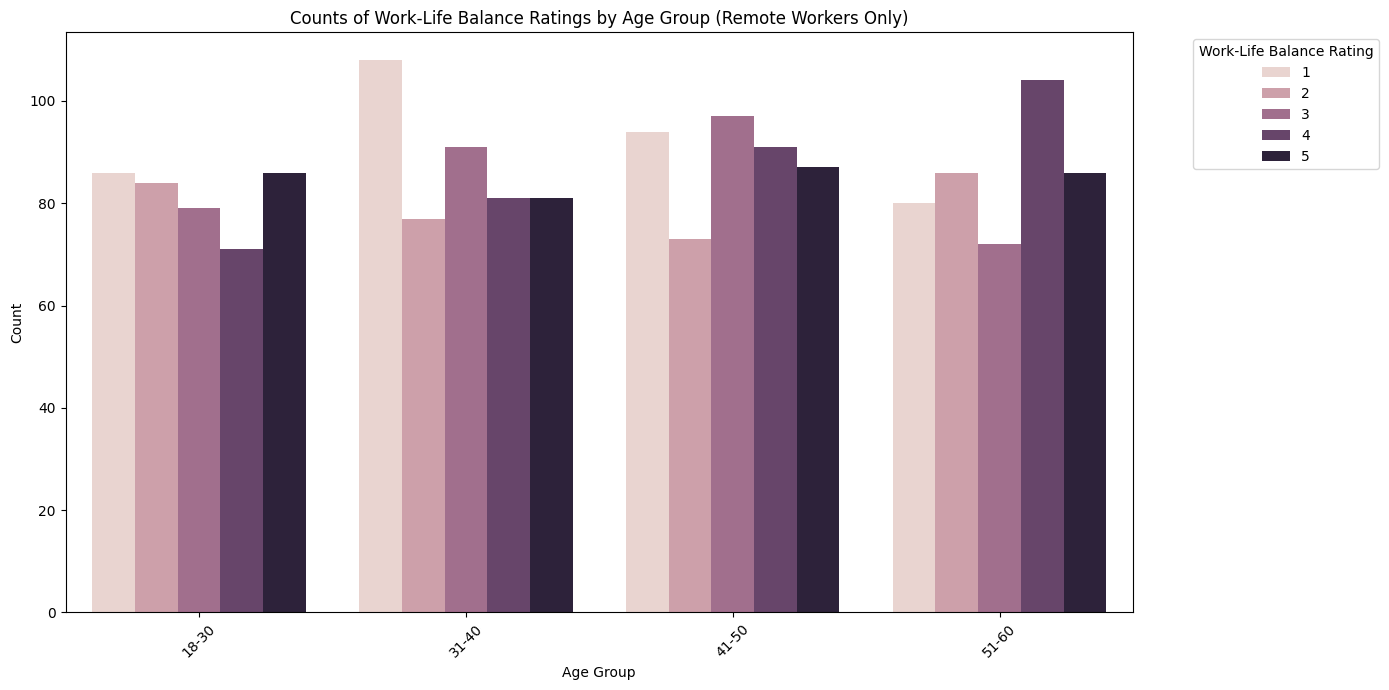

In [25]:
# Set the color palette
sns.set_palette("Set2")

# Count plot for work-life balance ratings across age groups for Remote workers only
plt.figure(figsize=(14, 7))
sns.countplot(data=df1_remote, x='Age_Group', hue='Work_Life_Balance_Rating', dodge=True)
plt.title('Counts of Work-Life Balance Ratings by Age Group (Remote Workers Only)')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Move the legend to the right
plt.legend(title='Work-Life Balance Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()


df1_non_remote is created for Onsite and Hybrid workers

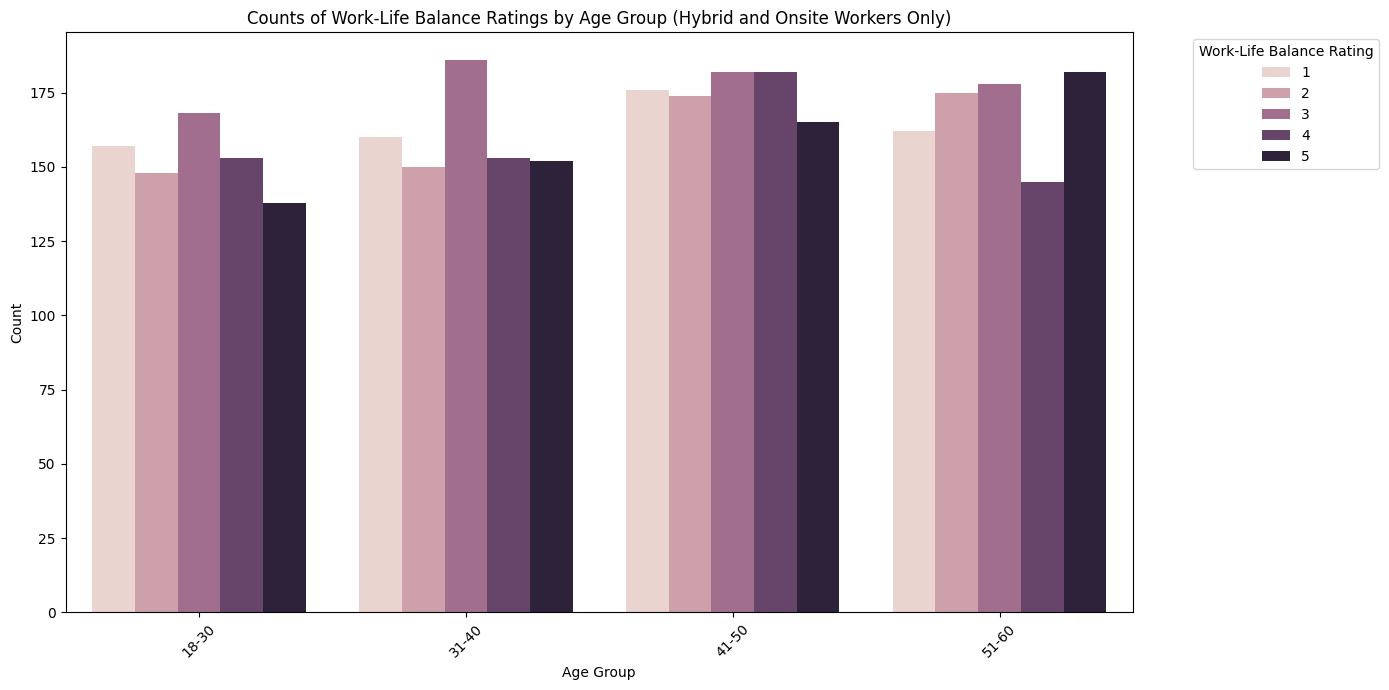

In [26]:
# Filter out Remote workers, keeping only Hybrid and Onsite
df1_non_remote = df1[df1['Work_Location'] != 'Remote']

# Set the color palette
sns.set_palette("Set2")

# Count plot for work-life balance ratings across age groups for Hybrid and Onsite workers
plt.figure(figsize=(14, 7))
sns.countplot(data=df1_non_remote, x='Age_Group', hue='Work_Life_Balance_Rating', dodge=True)
plt.title('Counts of Work-Life Balance Ratings by Age Group (Hybrid and Onsite Workers Only)')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Move the legend to the right
plt.legend(title='Work-Life Balance Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()


This Visualisation compare Average Work-Life Balance by Job Role and Work Location

<Figure size 1500x700 with 0 Axes>

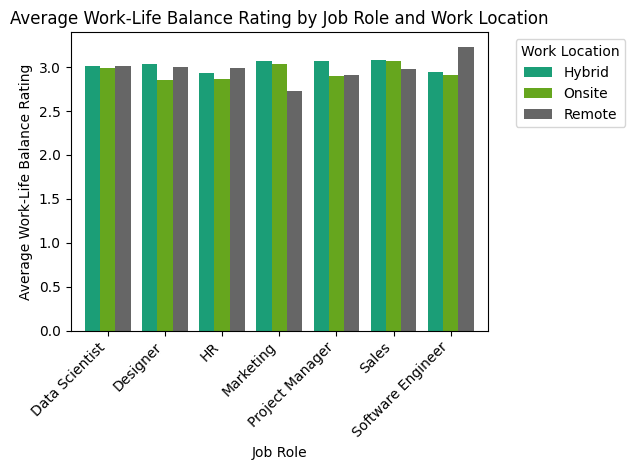

In [31]:
def analyze_work_life_balance(df1):
    # Set the color palette
    sns.set_palette("Dark2")  # Choosing a professional color palette

    # Average Work-Life Balance by Job Role and Work Location
    plt.figure(figsize=(15, 7))
    avg_wlb = df1.groupby(['Job_Role', 'Work_Location'])['Work_Life_Balance_Rating'].mean().unstack()
    avg_wlb.plot(kind='bar', width=0.8, colormap="Dark2")  # Apply colormap to match Seaborn palette
    plt.title('Average Work-Life Balance Rating by Job Role and Work Location')
    plt.xlabel('Job Role')
    plt.ylabel('Average Work-Life Balance Rating')
    plt.xticks(rotation=45, ha='right')

    # Move the legend to the right
    plt.legend(title='Work Location', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Run the function
analyze_work_life_balance(df1)


This Visualisation provides most indepth analysis of Average Work-Life Balance by Job Role

<ipython-input-33-7bf2a4d7e04a>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  work_life_balance_pivot = df1.pivot_table(values='Work_Life_Balance_Rating', index='Age_Group', columns='Job_Role', aggfunc='mean')


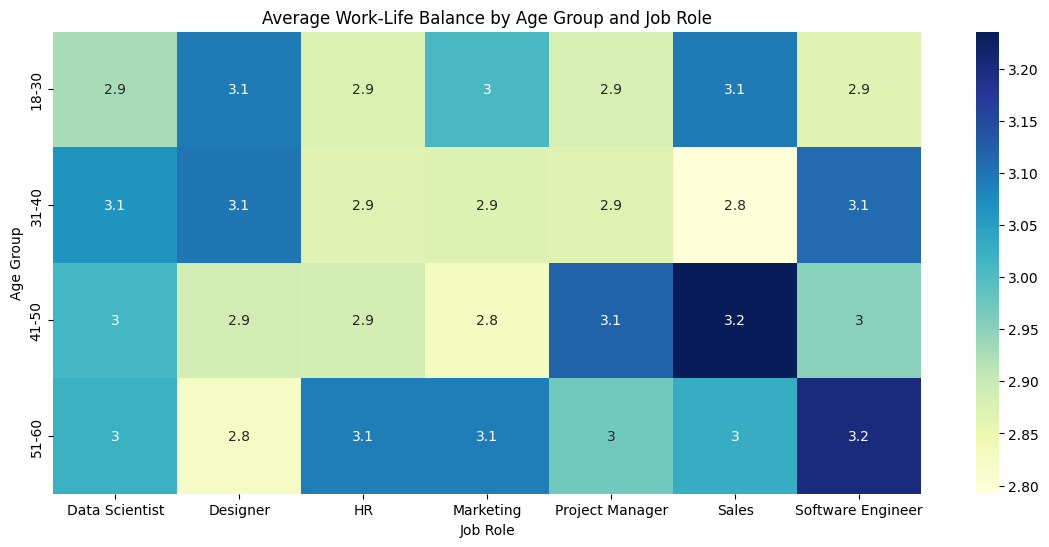

In [33]:
# Pivot table for heatmap
work_life_balance_pivot = df1.pivot_table(values='Work_Life_Balance_Rating', index='Age_Group', columns='Job_Role', aggfunc='mean')

plt.figure(figsize=(14, 6))
sns.heatmap(work_life_balance_pivot, annot=True, cmap='YlGnBu')
plt.title('Average Work-Life Balance by Age Group and Job Role')
plt.xlabel('Job Role')
plt.ylabel('Age Group')
plt.show()

This Visualisation provides most indepth analysis of Average Work-Life Balance by Job Role but only for Remote workers

<ipython-input-34-504beba2b8b1>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  work_life_balance_pivot = df1_remote.pivot_table(values='Work_Life_Balance_Rating', index='Age_Group', columns='Job_Role', aggfunc='mean')


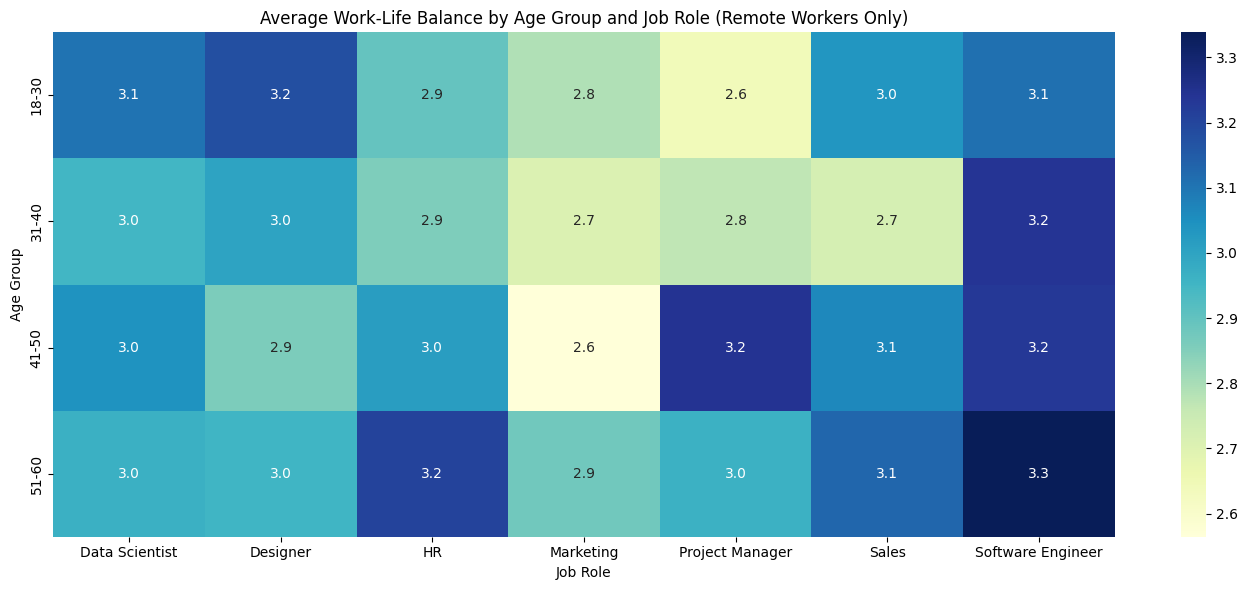

In [34]:
# Pivot table for heatmap (remote workers only)
work_life_balance_pivot = df1_remote.pivot_table(values='Work_Life_Balance_Rating', index='Age_Group', columns='Job_Role', aggfunc='mean')

plt.figure(figsize=(14, 6))
sns.heatmap(work_life_balance_pivot, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title('Average Work-Life Balance by Age Group and Job Role (Remote Workers Only)')
plt.xlabel('Job Role')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()


This provides work life ballance rating based on each work location

In [35]:
# Generate summary statistics for df1
print("\nSummary Statistics by Work Location:")
summary_stats = df1.groupby('Work_Location').agg({
    'Work_Life_Balance_Rating': ['mean', 'std', 'count']
}).round(2)
print(summary_stats)



Summary Statistics by Work Location:
              Work_Life_Balance_Rating            
                                  mean   std count
Work_Location                                     
Hybrid                            3.02  1.41  1649
Onsite                            2.95  1.39  1637
Remote                            2.98  1.43  1714


##Point Number 3

How does work location impact weekly hours worked and employee's social isolation
rating?

THis visualisation provides analysis on Weekly Hours Worked by Age Group and Work Location

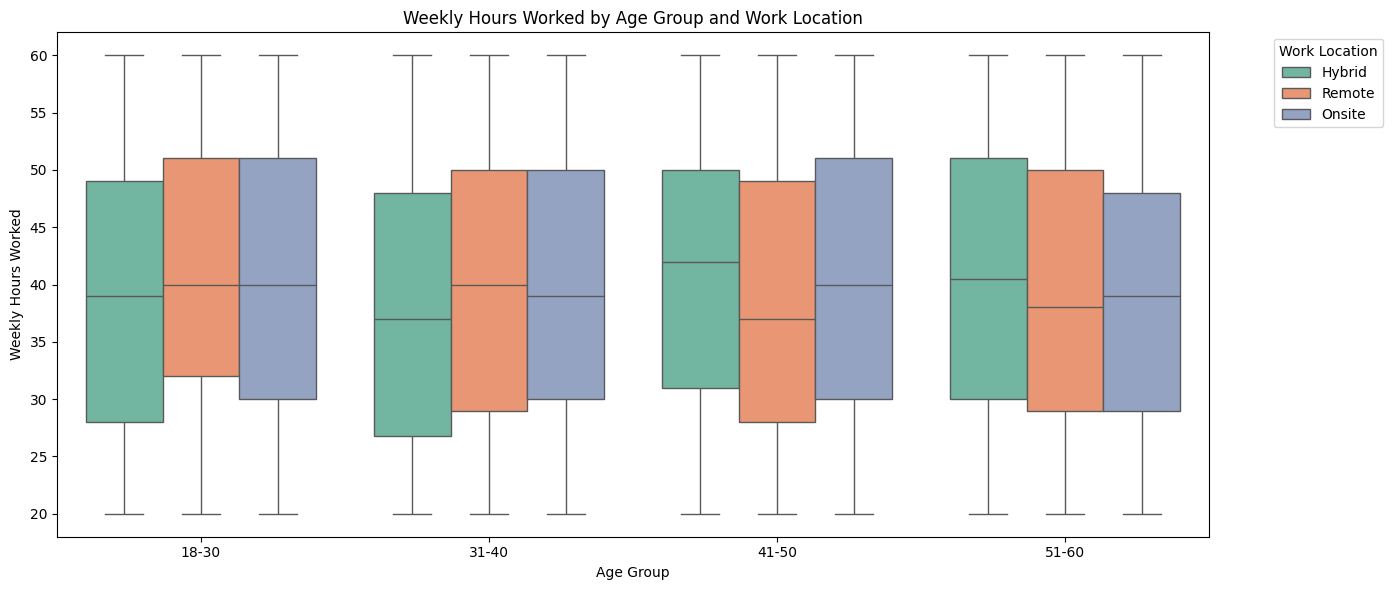

In [36]:
# Define age groups in df1
bins = [18, 30, 40, 50, 60]
labels = ['18-30', '31-40', '41-50', '51-60']
df1['Age_Group'] = pd.cut(df1['Age'], bins=bins, labels=labels)

# Plotting weekly hours worked by age group and work location
plt.figure(figsize=(14, 6))
sns.boxplot(data=df1, x='Age_Group', y='Hours_Worked_Per_Week', hue='Work_Location', palette="Set2")
plt.title('Weekly Hours Worked by Age Group and Work Location')
plt.xlabel('Age Group')
plt.ylabel('Weekly Hours Worked')

# Move the legend to the right
plt.legend(title='Work Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


This visualisation uses Kde plote for Distribution of Weekly Hours Worked by Work Location

<ipython-input-38-c164d0cfc76b>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df1[df1['Work_Location'] == 'Remote'], x='Hours_Worked_Per_Week', label='Remote', shade=True)
<ipython-input-38-c164d0cfc76b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df1[df1['Work_Location'] == 'Hybrid'], x='Hours_Worked_Per_Week', label='Hybrid', shade=True)
<ipython-input-38-c164d0cfc76b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df1[df1['Work_Location'] == 'Onsite'], x='Hours_Worked_Per_Week', label='Onsite', shade=True)


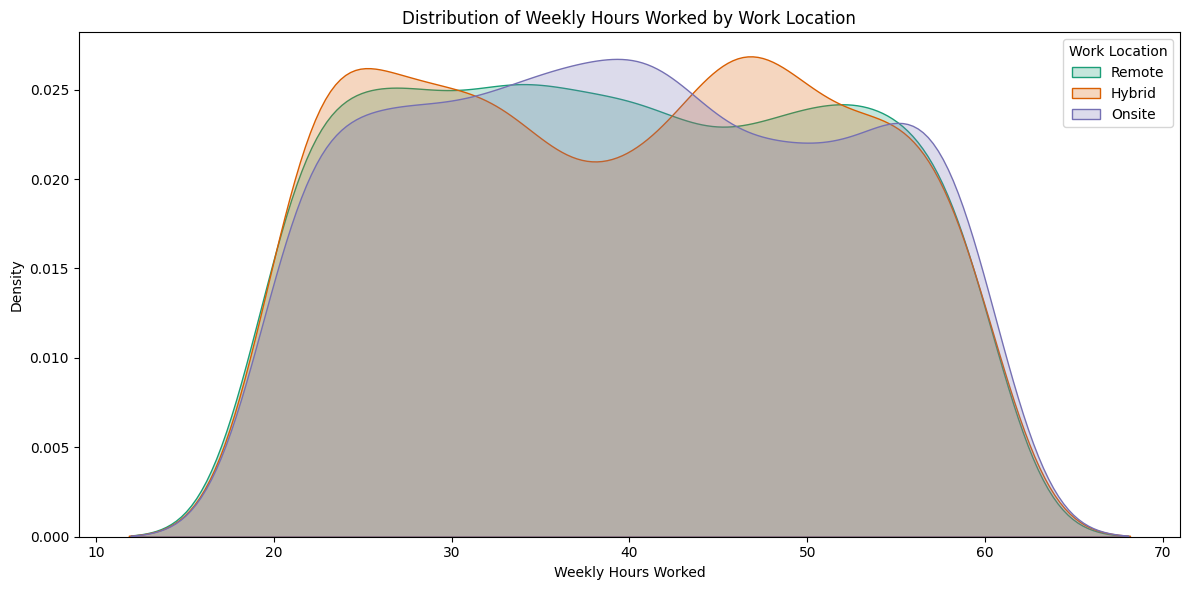

In [38]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df1[df1['Work_Location'] == 'Remote'], x='Hours_Worked_Per_Week', label='Remote', shade=True)
sns.kdeplot(data=df1[df1['Work_Location'] == 'Hybrid'], x='Hours_Worked_Per_Week', label='Hybrid', shade=True)
sns.kdeplot(data=df1[df1['Work_Location'] == 'Onsite'], x='Hours_Worked_Per_Week', label='Onsite', shade=True)
plt.title('Distribution of Weekly Hours Worked by Work Location')
plt.xlabel('Weekly Hours Worked')
plt.ylabel('Density')
plt.legend(title='Work Location')
plt.tight_layout()
plt.show()


This heatmap compares Average Social Isolation Rating by Weekly Hours Worked and Work Location

<ipython-input-39-cba6d67fabeb>:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df1.pivot_table(values='Social_Isolation_Rating', index='Hours_Worked_Bins', columns='Work_Location', aggfunc='mean')


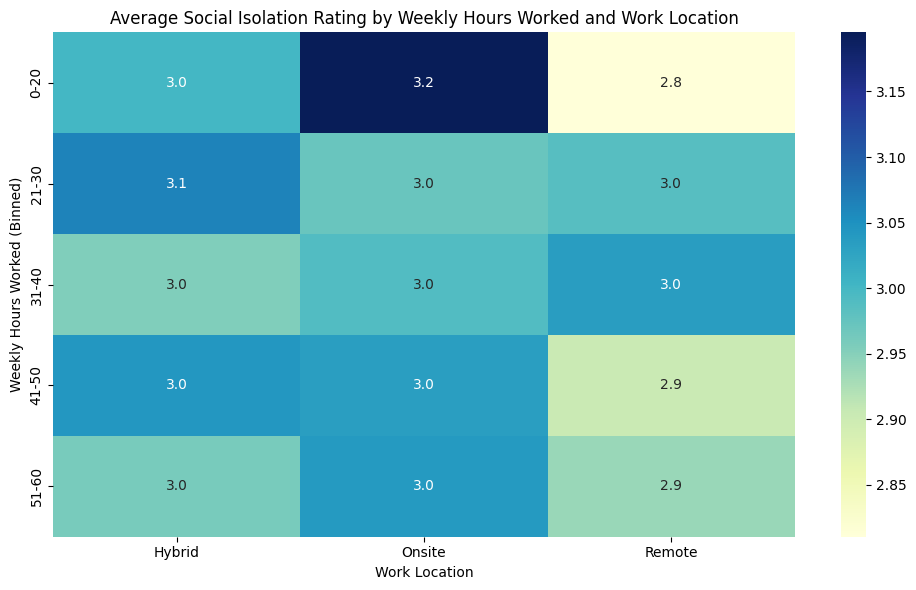

In [39]:
# Bin weekly hours to create ranges in df1
df1['Hours_Worked_Bins'] = pd.cut(df1['Hours_Worked_Per_Week'], bins=[0, 20, 30, 40, 50, 60, 70], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70'])

# Pivot table to get average social isolation rating by work location and hours worked bins
heatmap_data = df1.pivot_table(values='Social_Isolation_Rating', index='Hours_Worked_Bins', columns='Work_Location', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".1f")  # Using YlGnBu for a professional look
plt.title("Average Social Isolation Rating by Weekly Hours Worked and Work Location")
plt.xlabel("Work Location")
plt.ylabel("Weekly Hours Worked (Binned)")
plt.tight_layout()
plt.show()


In [42]:
#Statistical Analysis
print("\nStatistical Analysis:")
print("-" * 50)

# Summary statistics by work location in df1
summary_stats = df1.groupby('Work_Location').agg({
    'Hours_Worked_Per_Week': ['count', 'mean', 'std', 'min', 'max'],
    'Social_Isolation_Rating': ['mean', 'std']
}).round(3)

print("\nSummary Statistics by Work Location:")
print(summary_stats)



Statistical Analysis:
--------------------------------------------------

Summary Statistics by Work Location:
              Hours_Worked_Per_Week                          \
                              count    mean     std min max   
Work_Location                                                 
Hybrid                         1649  39.586  11.941  20  60   
Onsite                         1637  39.820  11.786  20  60   
Remote                         1714  39.446  11.857  20  60   

              Social_Isolation_Rating         
                                 mean    std  
Work_Location                                 
Hybrid                          3.008  1.394  
Onsite                          3.013  1.403  
Remote                          2.961  1.387  


##Point Number 4